# Machine Learning Engineer Nanodegree
## Capstone Project
### Kaggle Forest Cover Type Prediction Competition
Jonathan J. Hull, July 21, 2017

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

----
## Setup Environment and Read the Data

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline
inline_rc = dict(mpl.rcParams)

data = pd.read_csv("kaggle_train.csv")
pd.set_option('display.max_columns',None)
display(data.head(n=3))
print(len(data))

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


15120


## Data Exploration

In [3]:
# Total number of records
n_records = data.shape[0]

# count num. missing across both dimensions of data
num_missing    = data.isnull().sum().sum()
num_data_items = data.shape[1]
num_entries    = n_records*num_data_items
pct_missing    = 100.0*(float(num_missing))/num_entries

# Print the results
print("Total number of records: {}".format(n_records))
print("%d data items for each record: (%s)\n" % (num_data_items, list(data)))
print("%d=%f%% out of %d entries in input data are missing\n" % (num_missing,pct_missing,num_entries))

Total number of records: 15120
56 data items for each record: (['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type'])

0=0.000000% out 

### Rename columns

In [4]:
new_cols = ['id','elevation','aspect','slope','hd_hy','vd_hy','hd_rd','hs_9','hs_noon','hs_3',
            'hd_fp','wa1','wa2','wa3','wa4',
            's1','s2','s3','s4','s5','s6','s7','s8','s9','s10',
            's11','s12','s13','s14','s15','s16','s17','s18','s19','s20',
            's21','s22','s23','s24','s25','s26','s27','s28','s29','s30',
            's31','s32','s33','s34','s35','s36','s37','s38','s39','s40',
            'cover_type']
data.columns = new_cols
new_data = data.drop(['id'],axis=1)

### Class Distribution in Training Data

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: cover_type, dtype: int64
15120


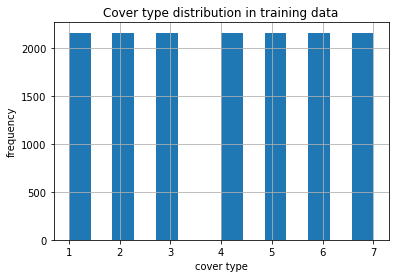

In [5]:
data['cover_type'].hist(bins=14).plot()
plt.title("Cover type distribution in training data")
plt.xlabel("cover type")
plt.ylabel("frequency")
print(data['cover_type'].value_counts())
print(len(data))

### Calculated Statistics Relevant to the Problem

In [6]:
t = new_data.describe()
display(t.ix[:,0:10].round(1))

,elevation,aspect,slope,hd_hy,vd_hy,hd_rd,hs_9,hs_noon,hs_3,hd_fp
count,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0
mean,2749.3,156.7,16.5,227.2,51.1,1714.0,212.7,219.0,135.1,1511.1
std,417.7,110.1,8.5,210.1,61.2,1325.1,30.6,22.8,45.9,1099.9
min,1863.0,0.0,0.0,0.0,-146.0,0.0,0.0,99.0,0.0,0.0
25%,2376.0,65.0,10.0,67.0,5.0,764.0,196.0,207.0,106.0,730.0
50%,2752.0,126.0,15.0,180.0,32.0,1316.0,220.0,223.0,138.0,1256.0
75%,3104.0,261.0,22.0,330.0,79.0,2270.0,235.0,235.0,167.0,1988.2
max,3849.0,360.0,52.0,1343.0,554.0,6890.0,254.0,254.0,248.0,6993.0


### Sampling of the Data

In [7]:
display(new_data.head(6))

,elevation,aspect,slope,hd_hy,vd_hy,hd_rd,hs_9,hs_noon,hs_3,hd_fp,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


### Univariate feature exploration -- Numeric features

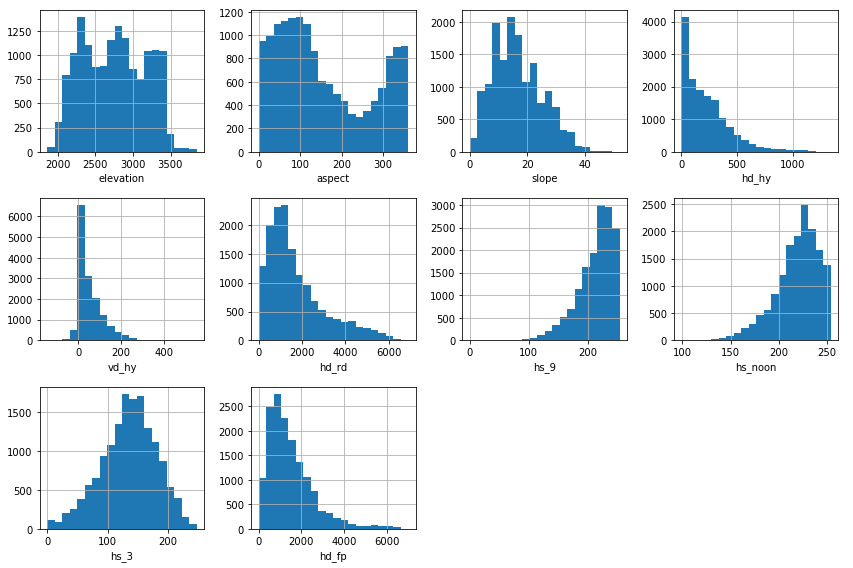

In [8]:
import matplotlib.gridspec as gridspec

def get_axes( gs, plt, rows, cols ):
    axes = list()
    for i in range(rows):
        for j in range(cols):
            axes.append( plt.subplot( gs[i,j] ) )
    return axes

rows, cols = 3, 4
fig  = plt.figure(figsize=(12, 8))
gs   = gridspec.GridSpec(rows, cols)
axes = get_axes( gs, plt, rows, cols )

plot_these = new_data.columns[:10]

for i, feature_name in enumerate(plot_these):
    new_data[feature_name].hist(ax=axes[i], bins=20)
    axes[i].set_xlabel(feature_name)
axes[10].axis('off')
axes[11].axis('off')
plt.tight_layout()

plt.show()

### Box  plots across classes

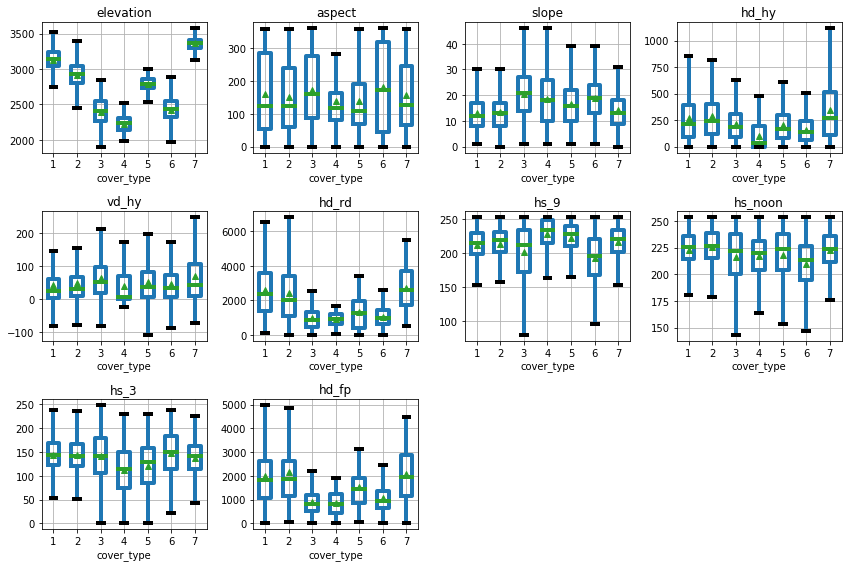

In [9]:
rows, cols = 3, 4
fig  = plt.figure(figsize=(12, 8))
gs   = gridspec.GridSpec(rows, cols)
axes = get_axes( gs, plt, rows, cols )

plot_these = new_data.columns[:10]
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

for i, feature_name in enumerate(plot_these):
    #print(feature_name)
    bp = new_data.boxplot(column=feature_name, by='cover_type', 
                      showfliers=False, showmeans=True,
                      boxprops=boxprops, medianprops=medianprops, return_type='dict', 
                      ax=axes[i]) 

    [[item.set_linewidth(4) for item in bp[key]['boxes']]    for key in bp.keys()]
    [[item.set_linewidth(4) for item in bp[key]['fliers']]   for key in bp.keys()]
    [[item.set_linewidth(4) for item in bp[key]['medians']]  for key in bp.keys()]
    [[item.set_linewidth(4) for item in bp[key]['means']]    for key in bp.keys()]
    [[item.set_linewidth(4) for item in bp[key]['whiskers']] for key in bp.keys()]
    [[item.set_linewidth(4) for item in bp[key]['caps']]     for key in bp.keys()]
    
    plt.suptitle("")
    
axes[10].axis('off')
axes[11].axis('off')
plt.tight_layout()
plt.show()

# https://stackoverflow.com/questions/35160956/pandas-boxplot-set-color-and-properties-for-box-median-mean

### Explore binary features

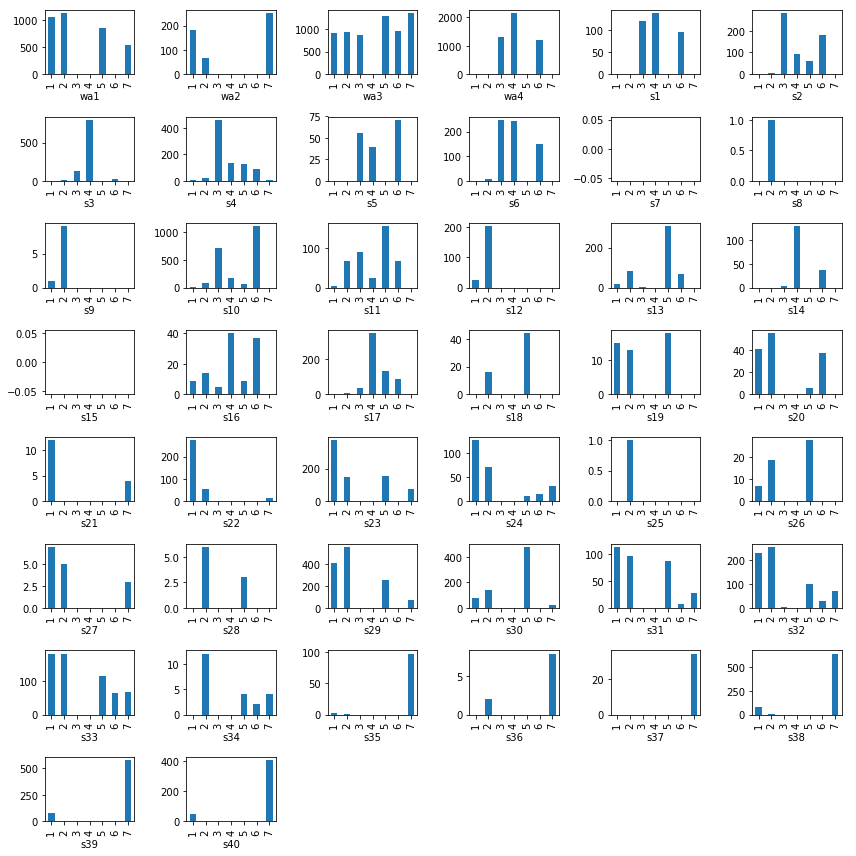

In [10]:
cover_types = [1, 2, 3, 4, 5, 6, 7]

rows, cols = 8, 6
fig        = plt.figure(figsize=(12, 12))
gs         = gridspec.GridSpec(rows, cols)
axes       = get_axes( gs, plt, rows, cols )

plot_these = new_data.columns[10:54]

for i, feature_name in enumerate( plot_these ):
    bars = pd.Series(index=cover_types)
    for c in cover_types:
        val = np.sum(new_data[new_data['cover_type'] == c][feature_name])
        bars.set_value(c, val)
    bars.plot(kind='bar',ax=axes[i])
    axes[i].set_xlabel(feature_name)

for i in range(44,rows*cols): axes[i].axis('off')
    
plt.tight_layout()

plt.show()

## Exploratory Visualization

### Locations of forest cover types -- the wilderness areas in which they occur

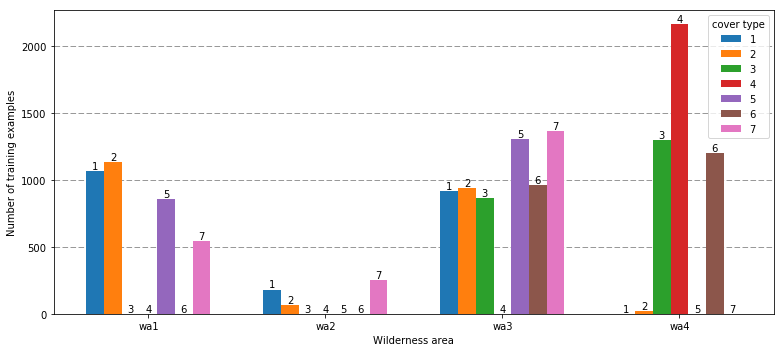

In [11]:
cover_types = [1, 2, 3, 4, 5, 6, 7]
n_features = 4
plot_these = new_data.columns[10:10+n_features]
bar_width = 0.10
opacity = 0.4
error_config = {'ecolor': '0.3'}
fig     = plt.figure(figsize=(11, 5))
ax      = plt.gca()
ax.grid(axis='y', linestyle='dashed', color='gray')
ax.set_axisbelow(True)

index = np.arange(n_features)

all_bars = list()
for c in cover_types:
    bars = list()
    for i, feature_name in enumerate( plot_these ):
        val = np.sum(new_data[new_data['cover_type'] == c][feature_name])
        bars.append(val)
    all_bars.append(bars)

for i,cover_type in enumerate(cover_types):
    rects = ax.bar(index+i*bar_width, all_bars[i], bar_width,
                 error_kw=error_config,
                 label=cover_type, zorder=200)
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height, cover_type, 
                ha='center', va='bottom', zorder=200)

plt.xlabel('Wilderness area')
plt.ylabel('Number of training examples')
plt.xticks(index+(bar_width*len(cover_types))/2-bar_width/2, ('wa1', 'wa2', 'wa3', 'wa4'))
plt.legend(title='cover type')

plt.tight_layout()
plt.show()

# https://matplotlib.org/examples/pylab_examples/barchart_demo.html
# https://matplotlib.org/examples/api/barchart_demo.html

### Feature pair correlations

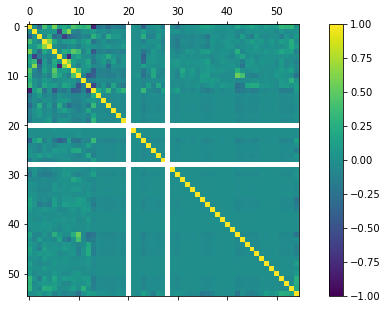

hd_hy      vd_hy    0.652142
aspect     hs_3     0.635022
hs_noon    hs_3     0.614526
elevation  hd_rd    0.578659
wa1        s29      0.546309
hd_rd      hd_fp    0.486386
elevation  hd_fp    0.443563
hd_fp      wa1      0.430723
elevation  hd_hy    0.412712
wa1        s30      0.401676
dtype: float64
elevation  wa4       -0.783651
hs_9       hs_3      -0.779965
slope      hs_noon   -0.612613
aspect     hs_9      -0.593997
wa3        wa4       -0.569200
wa1        wa3       -0.475352
hd_rd      wa4       -0.440454
hd_fp      wa4       -0.419972
hs_9       s10       -0.388943
wa1        wa4       -0.373787
dtype: float64


In [12]:
from matplotlib.pylab import *

fig     = plt.figure(figsize=(11, 5))
ax      = plt.gca()
#corrs = new_data.ix[:,0:54].corr(method='pearson')
corrs = new_data.corr(method='pearson')
cax = ax.matshow(corrs, vmin=-1, vmax=1) # , cmap=cm.gray)
fig.colorbar(cax)
plt.show()

#display(corrs)
keep        = np.triu(np.ones(corrs.shape)).astype('bool').reshape(corrs.size)
new_df      = corrs.stack(dropna=False)[keep]
sorted_vals = new_df.sort_values(ascending=False)
    
start = len(corrs.columns)-2
N = 10
print(sorted_vals[ start : start+N]); # skip the correlations between features and themselves, they're always 1.0
sorted_vals = new_df.sort_values(ascending=True)
print(sorted_vals[ 0 : N ]);

## Methodology

### Evaluate need for data transformations

We evaluate the need for transforming the numeric variables by dtermining their skew.  This tells us how similar their distribution is to normal.  If the absolute value of their skew is greater than 1, we need to apply a log transformation to make them more normal [1].

1.  T. Grande, “Data Transformation for Positively and Negatively Skewed Distributions in SPSS,” https://www.youtube.com/watch?v=_c3dVTRIK9c

In [13]:
print("Skew\n", new_data.iloc[:,:10].skew(), 
      "\nmin\n", new_data.iloc[:,:10].min(),
      "\nmax\n", new_data.iloc[:,:10].max(),
     )

Skew
 elevation    0.075640
aspect       0.450935
slope        0.523658
hd_hy        1.488052
vd_hy        1.537776
hd_rd        1.247811
hs_9        -1.093681
hs_noon     -0.953232
hs_3        -0.340827
hd_fp        1.617099
dtype: float64 
min
 elevation    1863
aspect          0
slope           0
hd_hy           0
vd_hy        -146
hd_rd           0
hs_9            0
hs_noon        99
hs_3            0
hd_fp           0
dtype: int64 
max
 elevation    3849
aspect        360
slope          52
hd_hy        1343
vd_hy         554
hd_rd        6890
hs_9          254
hs_noon       254
hs_3          248
hd_fp        6993
dtype: int64


### Perform log transformations for selected features

We see from the above statistics that the absolute value of the skew for hd_hy, vd_hy, hd_rd, hs_9, and hd_fp are all greater than one.  Furthermore, during our experimentation we found that the absolute value of the skew for hd_hy and hs_9 are still greater than one after one log transformation.  Therefore, they get two log transformations.  After that they are well behaved.

In [14]:
def transform( df, before, after ):
    # Note: we do different transformations depending on the sign of the feature's skew
    print("%s => %s" % (before,after))
    fudge = 1
    skew_sign = df[before].skew()
    if (skew_sign > 0):
        if (df[before].min() < 0): fudge += -(df[before].min())
        df[after] = df[before].apply(lambda x: np.log10(x+fudge))
    else:
        fudge += df[before].max()
        df[after] = df[before].apply(lambda x: np.log10(fudge-x))
        
    print("   min before:",df[before].min())
    print("   max before:",df[before].max())
    print("   skew before:", df[before].skew())
    print("   skew_after:", df[after].skew())
    print("   min after:",df[after].min())
    print("   max after:",df[after].max())
    return df

def apply_transformations( new_data ):
    new_data = transform(new_data,'hd_hy', 'hd_hy_log' )
    new_data = transform(new_data,'hd_hy_log', 'hd_hy_log_log' )
    new_data = transform(new_data,'vd_hy', 'vd_hy_log' )
    new_data = transform(new_data,'hd_rd', 'hd_rd_log' )
    new_data = transform(new_data,'hs_9',  'hs_9_log' )
    new_data = transform(new_data,'hs_9_log',  'hs_9_log_log' )
    new_data = transform(new_data,'hd_fp', 'hd_fp_log' )
    return new_data

new_data = apply_transformations( new_data )

new_data.head(3)


hd_hy => hd_hy_log
   min before: 0
   max before: 1343
   skew before: 1.48805249086
   skew_after: -1.60891653034
   min after: 0.0
   max after: 3.12839926872
hd_hy_log => hd_hy_log_log
   min before: 0.0
   max before: 3.12839926872
   skew before: -1.60891653034
   skew_after: 0.924625469883
   min after: 1.92865493311e-16
   max after: 0.61578169245
vd_hy => vd_hy_log
   min before: -146
   max before: 554
   skew before: 1.5377756805
   skew_after: 0.0352167638157
   min after: 0.0
   max after: 2.84571801797
hd_rd => hd_rd_log
   min before: 0
   max before: 6890
   skew before: 1.24781067847
   skew_after: -0.689219030704
   min after: 0.0
   max after: 3.83828224991
hs_9 => hs_9_log
   min before: 0
   max before: 254
   skew before: -1.09368056054
   skew_after: -1.13627084846
   min after: 0.0
   max after: 2.40654018043
hs_9_log => hs_9_log_log
   min before: 0.0
   max before: 2.40654018043
   skew before: -1.13627084846
   skew_after: 0.514014210742
   min after: 0.0
   

,elevation,aspect,slope,hd_hy,vd_hy,hd_rd,hs_9,hs_noon,hs_3,hd_fp,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,cover_type,hd_hy_log,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log,hs_9_log_log,hd_fp_log
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.413300,0.234289,2.167317,2.708421,1.531479,0.273015,3.797960
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.328380,0.255277,2.149219,2.592177,1.544068,0.270090,3.794209
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.429752,0.230103,2.326336,3.502564,1.322219,0.318965,3.786893


### Plot transformed features

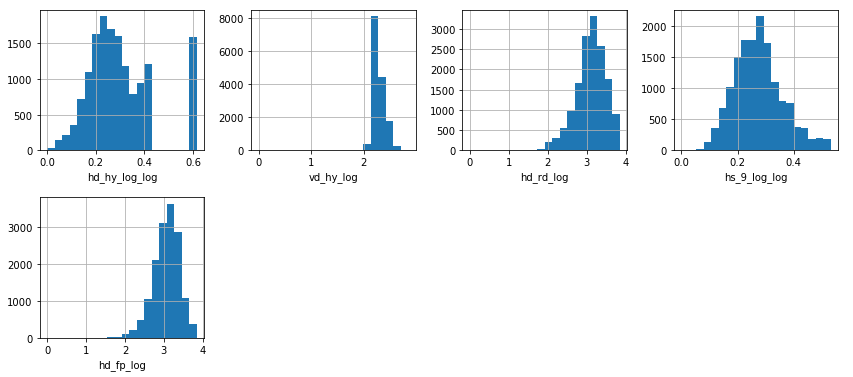

In [15]:
#
# Plot distribution of transformed features so we can visually confirm 
#   that they look more normal than before
#
rows, cols = 2, 4
fig  = plt.figure(figsize=(12, 5.35))
gs   = gridspec.GridSpec(rows, cols)
axes = get_axes( gs, plt, rows, cols )

plot_these = ['hd_hy_log_log','vd_hy_log','hd_rd_log','hs_9_log_log','hd_fp_log']

for i, feature_name in enumerate(plot_these):
    new_data[feature_name].hist(ax=axes[i], bins=20)
    axes[i].set_xlabel(feature_name)

for i in [5,6,7]: axes[i].axis('off')

plt.tight_layout()
plt.show()

### Prepare feature vectors for training data

In [16]:
Drop_features = ['s7','s15','hd_hy','hd_hy_log','vd_hy','hd_rd',
                 'hs_9','hs_9_log','hd_fp','cover_type']

pd.set_option('display.max_columns',None)
display(new_data.head())
features = new_data.copy().drop(Drop_features, axis=1)
display(features.head(10))

,elevation,aspect,slope,hd_hy,vd_hy,hd_rd,hs_9,hs_noon,hs_3,hd_fp,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,cover_type,hd_hy_log,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log,hs_9_log_log,hd_fp_log
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.413300,0.234289,2.167317,2.708421,1.531479,0.273015,3.797960
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.328380,0.255277,2.149219,2.592177,1.544068,0.270090,3.794209
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.429752,0.230103,2.326336,3.502564,1.322219,0.318965,3.786893
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2.385606,0.241246,2.423246,3.490099,1.230449,0.337677,3.793231
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2.187521,0.287998,2.164353,2.593286,1.544068,0.270090,3.790496


,elevation,aspect,slope,hs_noon,hs_3,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log_log,hd_fp_log
0,2596,51,3,232,148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.234289,2.167317,2.708421,0.273015,3.797960
1,2590,56,2,235,151,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.255277,2.149219,2.592177,0.270090,3.794209
2,2804,139,9,238,135,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.230103,2.326336,3.502564,0.318965,3.786893
3,2785,155,18,238,122,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.241246,2.423246,3.490099,0.337677,3.793231
4,2595,45,2,234,150,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.287998,2.164353,2.593286,0.270090,3.790496
5,2579,132,6,237,140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.217440,2.120574,1.832509,0.302893,3.780461
6,2606,45,7,225,138,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.229280,2.181844,2.802089,0.276008,3.796366
7,2605,49,4,230,144,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.244854,2.187521,2.758912,0.276008,3.794418
8,2617,45,9,221,133,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.242139,2.307496,2.824126,0.279071,3.795532
9,2612,59,10,219,124,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.239036,2.198657,2.804139,0.295606,3.794558


### Prepare training and testing sets for building the classifiers
Randomly choose 20% of the training data and set it aside for our evaluation.

In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split

classes  = new_data['cover_type']
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print(y_train.value_counts())

Training set has 12096 samples.
Testing set has 3024 samples.
2    1749
3    1742
7    1741
5    1732
4    1722
1    1721
6    1689
Name: cover_type, dtype: int64


### Initial Evaluation with Decision Tree

Get an idea what the decision tree thinks are the most informative features

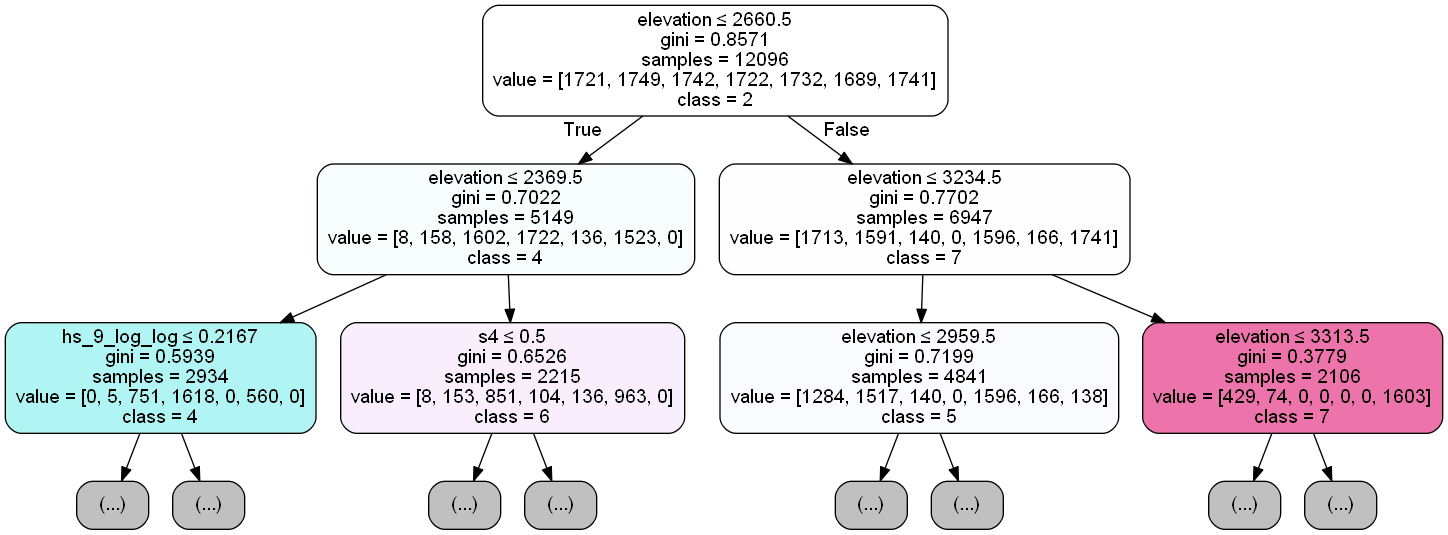

In [18]:
#
# derive a decision tree classifier for our data and plot its first two levels (below the root).
#  The purpose is to determine illustrate the utility of the graphviz visualization.
#
import pydotplus 
from IPython.display import Image
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(decision_tree=clf, filled=True, rounded=True, 
                                feature_names=features.columns, class_names=("1","2","3","4","5","6","7"),
                                max_depth=2, special_characters=True, out_file='dot.dot')
graph = pydotplus.graphviz.graph_from_dot_file("dot.dot")
Image(graph.create_png())  

### Optimize Random Forest Hyper Parameters

Objective: see how good we can do with a single tree-based classifier

In [19]:
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics          import fbeta_score, make_scorer, accuracy_score
from sklearn.model_selection  import StratifiedShuffleSplit
from sklearn.externals        import joblib
from sklearn.ensemble         import RandomForestClassifier

start_time=time()

Dump_clf = False
Load_clf = True

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=0, n_jobs=-1, max_features=8, # sqrt(52)
                             oob_score=False)

if (Load_clf) :
    best_rf_clf = joblib.load('best_rf_clf.pkl')
else: # build and dump new classifier
    # TODO: Create the hyper-parameters list you wish to tune
    # parameters = { 'n_estimators' : [1, 3], 'max_depth': [1, 3] }
    #
    #  the following hyper-parameter values were recommended in the Prettenhofer tutorial
    #
    parameters = {'n_estimators': [ 50, 100, 200 ],
                  'criterion': ['gini','entropy'],
                  #'learning_rate': [0.1, 0.05, 0.02, 0.01], 
                  #'max_depth': [4, 6],
                  'min_samples_leaf': [3, 5, 9, 50, 60]
                  #'max_features': [1.0, 0.3, 0.1]
                 }

    # TODO: Make an fbeta_score scoring object
    scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

    #  Use a stratified sample because there are a lot more examples of one class that the other in the input data
    cv = StratifiedShuffleSplit(y_train, test_size=0.2, random_state=42)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method
    grid_obj = GridSearchCV(clf, param_grid=parameters, cv=cv, scoring=scorer, verbose=1)

    # TODO: Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_rf_clf    = grid_obj.best_estimator_
    print("best params found by gridsearchCV=%s" % grid_obj.best_params_)
    # best_params = grid_obj.best_params_
    if (Dump_clf): joblib.dump(best_rf_clf, 'best_rf_clf.pkl')

best_name   = best_rf_clf.__class__.__name__
best_params = best_rf_clf.get_params()

print("Best classifier is %s" % best_name)
print("Best params=%s\n"      % best_params)

# Make predictions using the unoptimized and optimized models
train_predictions = best_rf_clf.predict(X_train)
test_predictions  = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions  = best_rf_clf.predict(X_test)

end_time=time()

# Report the before-and-afterscores

print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, train_predictions)))
print("Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_predictions, beta = 0.5, average='weighted')))

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, test_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, test_predictions, beta = 0.5, average='weighted')))

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='weighted')))
print("Total_time=%f secs." % (float(end_time) - start_time))


Best classifier is RandomForestClassifier
Best params={'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

Final accuracy score on the training data: 0.9668
Final F-score on the training data: 0.9666
Unoptimized model
------
Accuracy score on testing data: 0.8211
F-score on testing data: 0.8197

Optimized Model
------
Final accuracy score on the testing data: 0.8370
Final F-score on the testing data: 0.8336
Total_time=2.406695 secs.


### Read Kaggle test data

In [20]:
kaggle_test_data = pd.read_csv("kaggle_test.csv")
ids              = kaggle_test_data['Id']
kaggle_test_data.drop('Id',axis=1,inplace=True)
display(kaggle_test_data.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Rename columns and apply log transformations to Kaggle test data

In [21]:
if 'Horizontal_Distance_To_Hydrology' in kaggle_test_data.columns:
    for i in ['id','cover_type']: 
        if i in new_cols: new_cols.remove(i)
    kaggle_test_data.columns = new_cols
display(kaggle_test_data.head(1))
kaggle_test_data = apply_transformations( kaggle_test_data )
display(kaggle_test_data.head(1))
if 'cover_type' in Drop_features: Drop_features.remove('cover_type')
new_kaggle_test_data = kaggle_test_data.copy().drop(Drop_features, axis=1)
display(new_kaggle_test_data.head(1))

,elevation,aspect,slope,hd_hy,vd_hy,hd_rd,hs_9,hs_noon,hs_3,hd_fp,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40
0,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


hd_hy => hd_hy_log
   min before: 0
   max before: 1397
   skew before: 1.13316332149
   skew_after: -2.14325380214
   min after: 0.0
   max after: 3.14550717141
hd_hy_log => hd_hy_log_log
   min before: 0.0
   max before: 3.14550717141
   skew before: -2.14325380214
   skew_after: 1.04983527412
   min after: 0.0
   max after: 0.617577670778
vd_hy => vd_hy_log
   min before: -173
   max before: 601
   skew before: 1.79768720636
   skew_after: 0.47030776628
   min after: 0.0
   max after: 2.88930170251
hd_rd => hd_rd_log
   min before: 0
   max before: 7117
   skew before: 0.701911129027
   skew_after: -1.00592699684
   min after: 0.0
   max after: 3.85235798367
hs_9 => hs_9_log
   min before: 0
   max before: 254
   skew before: -1.18413814116
   skew_after: -1.03975131536
   min after: 0.0
   max after: 2.40654018043
hs_9_log => hs_9_log_log
   min before: 0.0
   max before: 2.40654018043
   skew before: -1.03975131536
   skew_after: 0.380032169072
   min after: 0.0
   max after: 0.53

,elevation,aspect,slope,hd_hy,vd_hy,hd_rd,hs_9,hs_noon,hs_3,hd_fp,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,hd_hy_log,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log,hs_9_log_log,hd_fp_log
0,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.617578,2.240549,3.428944,1.770852,0.213701,3.82256


,elevation,aspect,slope,hs_noon,hs_3,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log_log,hd_fp_log
0,2680,354,14,214,156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.617578,2.240549,3.428944,0.213701,3.82256


### Run best Random Forest classifier on Kaggle test data and export it

In [22]:
results               = pd.DataFrame( ids )
#results['Cover_Type'] = best_rf_clf.predict(new_kaggle_test_data)
#results.to_csv("submission_best_rf.csv", columns=['Id','Cover_Type'], index=False)

### Survey performance

In [23]:
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,\
                                 RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Classifiers =  [
           (MLPClassifier(alpha=1), "mlp"),
           (KNeighborsClassifier(7), "knn"),
           (DecisionTreeClassifier(), "dt"),
           (LogisticRegression(), "logistic"),
           (SGDClassifier(),  "sgd"),
           (RandomForestClassifier(n_estimators=200,n_jobs=-1,min_samples_leaf=3,criterion='entropy'),"rf_ent_ms3"),
           (RandomForestClassifier(n_estimators=100,n_jobs=-1,criterion='gini'),"rf_gini"),
           (RandomForestClassifier(n_estimators=100,n_jobs=-1,criterion='entropy'),"rf_ent"),
           (ExtraTreesClassifier(n_estimators=100,n_jobs=-1,criterion='gini'),"extra_gini"),
           (ExtraTreesClassifier(n_estimators=100,n_jobs=-1,criterion='entropy'),"extra_ent"),
           (GradientBoostingClassifier(learning_rate=0.1, max_depth=6, max_features=1.0, 
                                       min_samples_leaf=3, n_estimators=100), "grad_boost"),
           (SVC(gamma=0.001),"svc")
     ]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test) 

for clf, clf_name in Classifiers:
    start_time  = time()
    if (clf_name == "sgd" or clf_name == "knn" or clf_name == "logistic" ):
        learner     = clf.fit(X_train_scaled, y_train)
        predictions = clf.predict(X_test_scaled)
    else:
        learner     = clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
    end_time    = time()
    print("%s: %2.3f%% %0.1f secs." % (clf.__class__.__name__, \
                                       100.0*accuracy_score(y_test, predictions), \
                                      (end_time-start_time)))
    results           = pd.DataFrame( )
    results[clf_name] = predictions
    results.to_csv("%s.csv" % (clf_name), index=False)
    

MLPClassifier: 51.786% 2.5 secs.
KNeighborsClassifier: 77.976% 8.0 secs.
DecisionTreeClassifier: 77.381% 0.4 secs.
LogisticRegression: 68.816% 9.5 secs.
SGDClassifier: 61.310% 0.4 secs.
RandomForestClassifier: 83.069% 8.5 secs.
RandomForestClassifier: 85.086% 3.2 secs.
RandomForestClassifier: 85.417% 6.6 secs.
ExtraTreesClassifier: 85.648% 3.0 secs.
ExtraTreesClassifier: 85.086% 3.3 secs.
GradientBoostingClassifier: 83.466% 95.9 secs.
SVC: 66.435% 58.3 secs.


### Inspect correlations between classifiers

Look for classifiers that are not highly correlated with each others as they are likely to provide different information about an unknown sample.

In [24]:
all_results = pd.DataFrame()

for clf, clf_name in Classifiers:
    #print(clf_name)
    df = pd.read_csv("%s.csv" % (clf_name))
    all_results = pd.concat([all_results, df], axis=1)
    
all_results.corr()

,mlp,knn,dt,logistic,sgd,rf_ent_ms3,rf_gini,rf_ent,extra_gini,extra_ent,grad_boost,svc
mlp,1.000000,0.317817,0.314406,0.388905,0.411593,0.342081,0.339363,0.330085,0.337151,0.330083,0.340221,0.280076
knn,0.317817,1.000000,0.681232,0.681795,0.607419,0.825218,0.829455,0.831629,0.862868,0.845820,0.786205,0.569624
dt,0.314406,0.681232,1.000000,0.614131,0.586678,0.764561,0.783110,0.770255,0.762195,0.762763,0.781369,0.580251
logistic,0.388905,0.681795,0.614131,1.000000,0.748760,0.724824,0.702810,0.706480,0.709748,0.704026,0.704916,0.585286
sgd,0.411593,0.607419,0.586678,0.748760,1.000000,0.650052,0.635697,0.635055,0.646625,0.641521,0.640305,0.555707
rf_ent_ms3,0.342081,0.825218,0.764561,0.724824,0.650052,1.000000,0.938862,0.940645,0.918028,0.910817,0.894945,0.652093
rf_gini,0.339363,0.829455,0.783110,0.702810,0.635697,0.938862,1.000000,0.952680,0.941498,0.930651,0.905763,0.627266
rf_ent,0.330085,0.831629,0.770255,0.706480,0.635055,0.940645,0.952680,1.000000,0.945443,0.935472,0.900753,0.635197
extra_gini,0.337151,0.862868,0.762195,0.709748,0.646625,0.918028,0.941498,0.945443,1.000000,0.959034,0.880317,0.618555
extra_ent,0.330083,0.845820,0.762763,0.704026,0.641521,0.910817,0.930651,0.935472,0.959034,1.000000,0.890103,0.623864


### Optimize Gradient Boosting Classifier

In [25]:
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics          import fbeta_score, make_scorer
from sklearn.model_selection  import StratifiedShuffleSplit
from sklearn.externals        import joblib

start_time=time()

Dump_clf = False
Load_clf = True

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

if (Load_clf) :
    best_gbrt_clf = joblib.load('best_gbrt_clf.pkl')
else: # build and dump new classifier
    #  the following hyper-parameter values were recommended in the Prettenhofer tutorial
    #
    parameters = {'n_estimators': [100],
                  'learning_rate': [0.1, 0.05, 0.02, 0.01], 
                  'max_depth': [4, 6],
                  'min_samples_leaf': [3, 5, 9, 17], 
                  'max_features': [1.0, 0.3, 0.1]
                 }

    # TODO: Make an fbeta_score scoring object
    scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

    #  Use a stratified sample because there are a lot more examples of one class that the other in the input data
    cv = StratifiedShuffleSplit(y_train, test_size=0.2, random_state=42)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method
    grid_obj = GridSearchCV(clf, param_grid=parameters, cv=cv, scoring=scorer)

    # TODO: Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_gbrt_clf    = grid_obj.best_estimator_
    print("best params found by gridsearchCV=%s" % grid_obj.best_params_)
    # best_params = grid_obj.best_params_
    if (Dump_clf): joblib.dump(best_gbrt_clf, 'best_gbrt_clf.pkl')

best_name   = best_gbrt_clf.__class__.__name__
best_params = best_gbrt_clf.get_params()

print("Best classifier is %s" % best_name)
print("Best params=%s\n"      % best_params)

# Make predictions using the unoptimized and model
train_predictions = best_gbrt_clf.predict(X_train)
test_predictions  = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions  = best_gbrt_clf.predict(X_test)

end_time=time()

# Report the before-and-afterscores

print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, train_predictions)))
print("Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_predictions, beta = 0.5, average='weighted')))

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, test_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, test_predictions, beta = 0.5, average='weighted')))

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='weighted')))
print("Total_time=%f secs." % (float(end_time) - start_time))

Best classifier is GradientBoostingClassifier
Best params={'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 6, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}

Final accuracy score on the training data: 0.9827
Final F-score on the training data: 0.9827
Unoptimized model
------
Accuracy score on testing data: 0.7794
F-score on testing data: 0.7752

Optimized Model
------
Final accuracy score on the testing data: 0.8376
Final F-score on the testing data: 0.8362
Total_time=38.396148 secs.


### Optimize MLP

In [26]:
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics          import fbeta_score, make_scorer
from sklearn.model_selection  import StratifiedShuffleSplit
from sklearn.externals        import joblib
from sklearn.neural_network   import MLPClassifier

start_time=time()

Dump_clf = False
Load_clf = True

# TODO: Initialize the classifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)  # apply same transformation to test data


clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(X_train.shape[1], 19, 7), random_state=1)
print(clf)

if (Load_clf) :
    best_mlp_clf = joblib.load('best_mlp52_19_7_clf.pkl')
else: # build and dump new classifier
    parameters = {#'alpha: [0.00001]'
                    'alpha': [ 22.5 ]
                    #'alpha': [  10.0, 5.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 
                    #        0.00001, 0.000001, 0.0000001 ]
                    #'criterion': ['gini','entropy']
                 }

    # TODO: Make an fbeta_score scoring object
    scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

    #  Use a stratified sample because there are a lot more examples of one class that the other in the input data
    cv = StratifiedShuffleSplit(y_train, test_size=0.2, random_state=42)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method
    grid_obj = GridSearchCV(clf, param_grid=parameters, cv=cv, scoring=scorer, verbose=3)

    # TODO: Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train_scaled, y_train)

    # Get the estimator
    best_mlp_clf    = grid_obj.best_estimator_
    print("best params found by gridsearchCV=%s" % grid_obj.best_params_)
    # best_params = grid_obj.best_params_
    if (Dump_clf): joblib.dump(best_mlp_clf, 'best_mlp52_19_7_clf.pkl')

best_name   = best_mlp_clf.__class__.__name__
best_params = best_mlp_clf.get_params()

print("Best classifier is %s" % best_name)
print("Best params=%s\n"      % best_params)

# Make predictions using the unoptimized and optimized models
train_predictions = best_mlp_clf.predict(X_train_scaled)
test_predictions  = (clf.fit(X_train_scaled, y_train)).predict(X_test_scaled)
best_predictions  = best_mlp_clf.predict(X_test_scaled)

end_time=time()

# Report the before-and-afterscores

print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, train_predictions)))
print("Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_predictions, beta = 0.5, average='weighted')))

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, test_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, test_predictions, beta = 0.5, average='weighted')))

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='weighted')))
print("Total_time=%f secs." % (float(end_time) - start_time))

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(52, 19, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
Best classifier is MLPClassifier
Best params={'activation': 'relu', 'alpha': 22.5, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (52, 19, 7), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Final accuracy score on the training data: 0.8484
Final F-score on the trai

### Optimize SGD

In [27]:
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics          import fbeta_score, make_scorer
from sklearn.model_selection  import StratifiedShuffleSplit
from sklearn.externals        import joblib

start_time=time()

Dump_clf = False
Load_clf = True

# TODO: Initialize the classifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)  # apply same transformation to test data

n_iter = np.ceil(10**6 / len(X_train))
clf = SGDClassifier(n_iter=n_iter)

if (Load_clf) :
    best_sgd_clf = joblib.load('best_sgd_clf.pkl')
else: # build and dump new classifier
    parameters = {'alpha': [  1.0, 0.1, 0.01, 0.001, 0.0001, 
                            0.00001, 0.000001, 0.0000001 ]
                 }

    # TODO: Make an fbeta_score scoring object
    scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

    #  Use a stratified sample because there are a lot more examples of one class that the other in the input data
    cv = StratifiedShuffleSplit(y_train, test_size=0.2, random_state=42)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method
    grid_obj = GridSearchCV(clf, param_grid=parameters, cv=cv, scoring=scorer)

    # TODO: Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train_scaled, y_train)

    # Get the estimator
    best_sgd_clf    = grid_obj.best_estimator_
    print("best params found by gridsearchCV=%s" % grid_obj.best_params_)
    # best_params = grid_obj.best_params_
    if (Dump_clf): joblib.dump(best_sgd_clf, 'best_sgd_clf.pkl')

best_name   = best_sgd_clf.__class__.__name__
best_params = best_sgd_clf.get_params()

print("Best classifier is %s" % best_name)
print("Best params=%s\n"      % best_params)

# Make predictions using the unoptimized and optimized models
train_predictions = best_sgd_clf.predict(X_train_scaled)
test_predictions  = (clf.fit(X_train_scaled, y_train)).predict(X_test_scaled)
best_predictions  = best_sgd_clf.predict(X_test_scaled)

end_time=time()

# Report the before-and-afterscores

print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, train_predictions)))
print("Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_predictions, beta = 0.5, average='weighted')))

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, test_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, test_predictions, beta = 0.5, average='weighted')))

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='weighted')))
print("Total_time=%f secs." % (float(end_time) - start_time))

Best classifier is SGDClassifier
Best params={'alpha': 0.001, 'average': False, 'class_weight': None, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'n_iter': 83.0, 'n_jobs': 1, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'verbose': 0, 'warm_start': False}

Final accuracy score on the training data: 0.6699
Final F-score on the training data: 0.6596
Unoptimized model
------
Accuracy score on testing data: 0.6554
F-score on testing data: 0.6478

Optimized Model
------
Final accuracy score on the testing data: 0.6802
Final F-score on the testing data: 0.6670
Total_time=3.506905 secs.


## Develop Classifier Combination Technique

Compute performance of various optimized classifiers and save both their decisions as well as the probabilities they assigned to each class when they made those decisions

In [28]:
Run_kaggle = False

best_mlp_clf  = joblib.load('best_mlp52_19_7_clf.pkl')
best_rf_clf   = joblib.load('best_rf_clf.pkl')
best_sgd_clf  = joblib.load('best_sgd_clf.pkl')
best_gbrt_clf = joblib.load('best_gbrt_clf.pkl')
clf5          = KNeighborsClassifier(n_neighbors=7)
clf6          = DecisionTreeClassifier()
clf7          = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,criterion='entropy')

Classifiers = [ #(best_mlp_clf,"best_mlp") , 
                (best_rf_clf, "best_rf") , 
                #(best_sgd_clf,"best_sgd"), 
                (best_gbrt_clf,"best_gbrt") ,
                #(clf5, "knn"), 
                #(clf6, "dt"), 
                (clf7,"extra_trees")]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled   = scaler.transform(X_train)
X_test_scaled    = scaler.transform(X_test) 
kaggle_scaled    = scaler.transform(new_kaggle_test_data)

test_data        = X_test
test_data_scaled = X_test_scaled
if (Run_kaggle):
    test_data        = new_kaggle_test_data
    test_data_scaled = kaggle_scaled
    
train_probs, test_probs = pd.DataFrame(), pd.DataFrame()
train_predict_probs, test_predict_probs = np.empty([len(X_train), 0]), np.empty([len(test_data),0])
    
for clf, clf_name in Classifiers:
    start_time  = time()
    if (clf_name == "knn" or clf_name == "dt" or clf_name == "extra_trees"):
        clf.fit(X_train,y_train)
    if (clf_name == "best_mlp" or clf_name == "best_sgd"):
        train_predictions = clf.predict(X_train_scaled)
        if (clf_name != "best_sgd"): 
            train_predict_probs = np.concatenate((train_predict_probs, 
                                                 clf.predict_proba(X_train_scaled)),axis=1)
        test_predictions  = clf.predict(test_data_scaled)
        if (clf_name != "best_sgd") : 
            test_predict_probs = np.concatenate( (test_predict_probs,
                                                  clf.predict_proba(test_data_scaled)), axis=1)
    else:
        train_predictions   = clf.predict(X_train)
        train_predict_probs = np.concatenate((train_predict_probs,
                                              clf.predict_proba(X_train)),axis=1)
        test_predictions    = clf.predict(test_data)
        test_predict_probs  = np.concatenate( (test_predict_probs,
                                               clf.predict_proba(test_data)), axis=1)
    end_time    = time()
    print("%s: %2.3f%% %0.1f secs." % (clf.__class__.__name__, \
                                       100.0*accuracy_score(y_train, train_predictions), \
                                      (end_time-start_time)))
    if (not(Run_kaggle)): print("%2.3f%%" % (100.0*accuracy_score(y_test, test_predictions)))
    
    train_results, test_results = pd.DataFrame(), pd.DataFrame()
    train_results[clf_name], test_results[clf_name] = train_predictions, test_predictions
    
    train_results.to_csv("%s.csv" % (clf_name + "_train"), index=False)
    test_results.to_csv("%s.csv" % (clf_name + "_test"), index=False)

RandomForestClassifier: 96.677% 2.8 secs.
83.697%
GradientBoostingClassifier: 98.272% 2.2 secs.
83.763%
ExtraTreesClassifier: 100.000% 4.6 secs.
84.987%


### Compute matrix of all results on training and test sets

In [29]:
train_results = pd.DataFrame()
test_results  = pd.DataFrame()

for clf, clf_name in Classifiers:
    print(clf_name)
    df = pd.read_csv("%s_train.csv" % (clf_name))
    train_results = pd.concat([train_results, df], axis=1)
    df = pd.read_csv("%s_test.csv" % (clf_name))
    test_results = pd.concat([test_results, df], axis=1)
    
#display(train_results.corr())
#display(test_results.corr())

best_rf
best_gbrt
extra_trees


### Combine Results with Majority Vote

In [30]:
#voters = ["best_mlp", "best_rf", "best_sgd","best_gbrt","knn","dt", "extra_trees"]
voters = ["best_rf","best_gbrt","extra_trees"]

def majority(r):
    vote = [ 0 for i in range(0,7) ]
    for i in range(len(r)):
        vote[ r.ix[i]-1 ] += 1
    return np.argmax(vote)+1

train_results['majority'] = train_results[voters].apply(lambda x: majority(x), axis=1)
print("training data: %2.3f%%" % (100.0*accuracy_score(y_train, train_results['majority'])))
#print(train_results.tail(10))

test_results['majority'] = test_results[voters].apply(lambda x: majority(x), axis=1)
if (not(Run_kaggle)):
    print("testing data: %2.3f%%" % (100.0*accuracy_score(y_test, test_results['majority'])))
#print(test_results.tail(10))

training data: 99.140%
testing data: 84.722%


### Write Kaggle predictions to submission file

In [31]:
if (Run_kaggle):
    results               = pd.DataFrame( ids )
    results['Cover_Type'] = test_results['majority']
    # results.to_csv("submission_majority_vote.csv", columns=['Id','Cover_Type'], index=False)

### Blend results with Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_predict_probs) 
train_predict_probs_scaled = scaler.transform(train_predict_probs)
test_predict_probs_scaled  = scaler.transform(test_predict_probs)

lr.fit(train_predict_probs_scaled, y_train)
#print(train_predictions[:5])

predictions = lr.predict( train_predict_probs_scaled )
print("training data: %2.3f%%" % (100.0*accuracy_score(y_train, predictions)))

predictions = lr.predict( test_predict_probs_scaled )
if (not(Run_kaggle)): print("testing data: %2.3f%%" % (100.0*accuracy_score(y_test, predictions)))

training data: 100.000%
testing data: 85.615%


In [33]:
X_test.head()

,elevation,aspect,slope,hs_noon,hs_3,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log_log,hd_fp_log
4428,2220,18,12,215,140,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615782,2.167317,2.918555,0.246274,2.546543
12399,2139,119,10,232,125,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615782,2.167317,2.970347,0.332694,2.812245
4647,2292,109,26,201,58,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.265488,2.389166,2.943000,0.492133,3.155336
5953,2345,92,13,220,109,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615782,2.167317,2.662758,0.348392,2.733999
2946,1948,347,13,218,162,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615782,2.167317,2.257679,0.209839,2.747412


### Write  Kaggle predictions to submission file

In [34]:
if (Run_kaggle):
    results               = pd.DataFrame( ids )
    results['Cover_Type'] = predictions
    #results.to_csv("submission_blended.csv", columns=['Id','Cover_Type'], index=False)

### Prepare the Free-Form Visualization

In [106]:
preds=pd.DataFrame(predictions, columns=['blended'])
graph_this = pd.concat([X_test.reset_index(drop=True),y_test.reset_index(drop=True),test_results,preds],axis=1)

In [107]:
graph_this.head()

,elevation,aspect,slope,hs_noon,hs_3,wa1,wa2,wa3,wa4,s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log_log,hd_fp_log,cover_type,best_rf,best_gbrt,extra_trees,majority,blended
0,2220,18,12,215,140,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615782,2.167317,2.918555,0.246274,2.546543,4,4,4,4,4,4
1,2139,119,10,232,125,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615782,2.167317,2.970347,0.332694,2.812245,4,4,4,4,4,4
2,2292,109,26,201,58,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.265488,2.389166,2.943000,0.492133,3.155336,4,4,4,4,4,4
3,2345,92,13,220,109,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615782,2.167317,2.662758,0.348392,2.733999,4,4,4,4,4,4
4,1948,347,13,218,162,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615782,2.167317,2.257679,0.209839,2.747412,3,4,4,4,4,4


In [305]:
graph_this['aspect'].quantile([0.25,0.5,0.75])

0.25     65.0
0.50    124.5
0.75    260.0
Name: aspect, dtype: float64

### Constuct table of differences between blended classifiers and random forest

Objective: show the difference between blending and one classifier alone

In [306]:
import itertools

def get_pcts( df, num_wa ):
    N = len(df)
    corr_best_rf = len(df[df['cover_type'] == df['best_rf']])
    corr_blended = len(df[df['cover_type'] == df['blended']])
    pct_rf = corr_best_rf / N
    pct_blended = corr_blended / N
    val = pct_blended-pct_rf
    return val

def get_label(start,end, n):
    if start == 0: res = "<= %d" % (end)
    elif end > 1000: res = "> %d" % (start)
    else: res = "> %d & <= %d" % (start,end)
    return res

#
#  The 'aspect' variable seems to exhibit some interesting differences in performance
#  across wilderness area, let's take a look:
#
aspect_quartiles = [(0,65),(65,125),(125,260),(260,100000000000000000)]
l = [get_label(i,j,1) for i,j in aspect_quartiles]
#
#  "graph"  is the dataframe that holds the data to be plotted
#
graph = pd.DataFrame(index=['wa1','wa2','wa3','wa4'],columns=l)

for start,end in aspect_quartiles:
    #print(start, end)
    aspect = graph_this[ (graph_this['aspect'] > start) & (graph_this['aspect'] <= end)]
    for wa in ['wa1','wa2','wa3','wa4']:
        num_wa = np.sum(graph_this[wa])
        new_aspect = aspect[aspect[wa] == 1]
        graph.set_value(wa,get_label(start,end,1),get_pcts(new_aspect,num_wa))

In [307]:
display(graph)

,<= 65,> 65 & <= 125,> 125 & <= 260,> 260
wa1,0.056338,0.0116732,0.0447761,0.00980392
wa2,0.107143,0.0625,0,-0.0263158
wa3,0.0105263,-0.00411523,0.0169492,0.00993377
wa4,0.0140187,0.0338983,0.0052356,0.0226537


### Plot difference between blender and RF across wilderness areas and over the aspect 

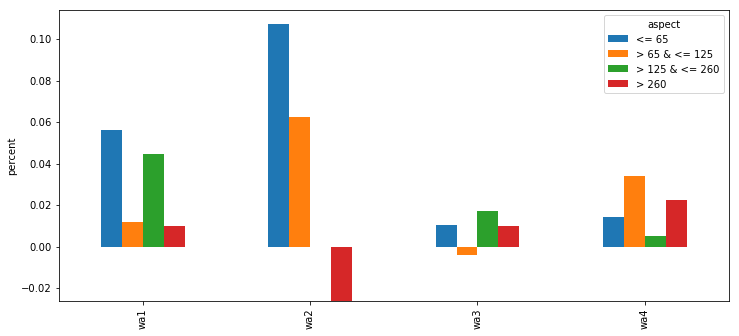

In [315]:
fig  = plt.figure(figsize=(12, 5.35))
ax=plt.gca()
graph.plot(kind='bar', ax=ax)
ax.legend(title='aspect')
plt.ylabel("percent")